<a href="https://colab.research.google.com/github/LennyRBriones/object_detection/blob/main/json_tfrecord.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 It´s important to kwnown that it´s irrelevant upload the original dataset, labeling take the same name as the image

In [10]:
import json
import pickle
import zipfile
import pandas as pd

!pip install tf_slim

In [11]:
local_zip = "/content/dataset_filtrado.zip"
zip_ref = zipfile.ZipFile(local_zip, "r")
zip_ref.extractall("dataset_filtrado")
zip_ref.close()

In [12]:
!ls dataset_filtrado/dataset_filtrado

007d086a0d.jpg	34db31dbb7.jpg	576c712438.jpg	93407ba6ac.jpg	e22a1fc8c5.jpg
0414eb4d03.jpg	37e9f4c722.jpg	5cc8e6c42d.jpg	95614aebd9.jpg	e4927496c4.jpg
07ffa35d1f.jpg	38073088aa.jpg	636e60da4d.jpg	abdbb7257d.jpg	e79711e10f.jpg
0c535fcdfa.jpg	39339a1089.jpg	6450b21594.jpg	b22ad30e1b.jpg	e9379064f8.jpg
1180fcd71f.jpg	3b2d25d42c.jpg	66d55e26e2.jpg	b59018d131.jpg	ea2cb5917b.jpg
18cf3b73b6.jpg	3ec8255ddd.jpg	6f65ac7a0a.jpg	bf5b9af373.jpg	ea8ce9da21.jpg
2b37a718bc.jpg	42e14b904b.jpg	717e612946.jpg	c4054a8f2c.jpg	f74248c57f.jpg
2c3ae2799b.jpg	4848bc97c4.jpg	744ca71f5a.jpg	c554e9b7b4.jpg	f8a2cc7848.jpg
2c7120c43a.jpg	486107bbf0.jpg	7490c9ba04.jpg	cbb99fc122.jpg	fc15988c9a.jpg
2efb6c3c82.jpg	530a817c7a.jpg	89c26158c4.jpg	cf8db02eac.jpg
2fdd9eb661.jpg	533dd3ae49.jpg	8a98fca468.jpg	d01c4bbb38.jpg
2feaa7dff6.jpg	53f2146ec4.jpg	8e933395c2.jpg	e02950195f.jpg


In [13]:
type_file = "train"
path = "/content/smart-city-test-train.json"
data_file = open(path)
data = json.load(data_file)


In [9]:
data

[{'id': '9d4a5c2a-41f9-4c06-baa6-2681350e18df874e3f89-1020-4235-92ca-61aba5eecf45',
  'image': '6f65ac7a0a.jpg',
  'width': 681,
  'height': 1023,
  'timestamp': '0',
  'segmentation_url': '',
  'classification': [],
  'skiped': False,
  'tags': [{'parent': None,
    'color': '#0d1ea0',
    'pos': {'x': 112.1962879640045,
     'y': 363.63104611923507,
     'w': 323.35545556805397,
     'h': 443.0314960629921},
    'classes': [],
    'name': 'motorcycle',
    'id': '25086408-46a2-47b4-9289-6c629cb40f39',
    'text': None,
    'type': 'bounding_box'}]},
 {'id': '9d4a5c2a-41f9-4c06-baa6-2681350e18df2051633d-cc6a-4158-9234-b6706b0e99b0',
  'image': '3ec8255ddd.jpg',
  'width': 640,
  'height': 640,
  'timestamp': '0',
  'segmentation_url': '',
  'classification': [],
  'skiped': False,
  'tags': [{'parent': None,
    'color': '#0d1ea0',
    'pos': {'x': 13, 'y': 70.5, 'w': 569, 'h': 518},
    'classes': [],
    'name': 'motorcycle',
    'id': '1b8f8e3c-8914-4102-8e59-ebcd1c01d238',
    'te

In [14]:
csv_list = []

for classification in data:
    width, height = classification["width"], classification["height"]
    image = classification["image"]
    for item in classification["tags"]:
      name = item["name"]
      xmin = item["pos"]["x"]  #In this case pos because x is between "pos"
      ymin = item["pos"]["y"]
      xmax = item["pos"]["x"] + item["pos"]["w"]
      ymax = item["pos"]["y"] + item["pos"]["h"]

      value =(image, width, height, name, xmin, ymin, xmax, ymax)
      csv_list.append(value)

column_name = ["filename", "width", "height", "class", "xmin", "ymin", "xmax", "ymax" ]
csv_df = pd.DataFrame(csv_list, columns = column_name)

csv_df.to_csv("/content/{}_labels.csv".format(type_file))

In [15]:
type_file = "test"
path = "/content/smart-city-test.json"
data_file = open(path)
data = json.load(data_file)


In [16]:
csv_list = []

for classification in data:
    width, height = classification["width"], classification["height"]
    image = classification["image"]
    for item in classification["tags"]:
      name = item["name"]
      xmin = item["pos"]["x"]  #In this case pos because x is between "pos"
      ymin = item["pos"]["y"]
      xmax = item["pos"]["x"] + item["pos"]["w"]
      ymax = item["pos"]["y"] + item["pos"]["h"]

      value =(image, width, height, name, xmin, ymin, xmax, ymax)
      csv_list.append(value)

column_name = ["filename", "width", "height", "class", "xmin", "ymin", "xmax", "ymax" ]
csv_df = pd.DataFrame(csv_list, columns = column_name)

csv_df.to_csv("/content/{}_labels.csv".format(type_file))

Object detection API

[TensorFlow Object Detection API](https://tensorflow-object-detection-api-tutorial.readthedocs.io/en/tensorflow-1.14/training.html)

In [17]:
import os
%cd /content
!git clone --quiet https://github.com/tensorflow/models.git
%cd /content/models/
!git checkout 58d19c67e1d30d905dd5c6e5092348658fed80af
!apt-get update && apt-get install -y -qq protobuf-compiler python-pil python-lxml python-tk
!pip install -q Cython contextlib2 pillow lxml matplotlib
!pip install -q pycocotools
%cd /content/models/research
!protoc object_detection/protos/*.proto --python_out=.
os.environ['PYTHONPATH'] += ':/content/models/research/:/content/models/research/slim/'
!python object_detection/builders/model_builder_test.py

/content
/content/models
Note: switching to '58d19c67e1d30d905dd5c6e5092348658fed80af'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by switching back to a branch.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -c with the switch command. Example:

  git switch -c <new-branch-name>

Or undo this operation with:

  git switch -

Turn off this advice by setting config variable advice.detachedHead to false

HEAD is now at 58d19c67e Internal change
Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:2 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:5 http://archive.ubuntu.com/ubuntu jammy-backports InRele

In [19]:
# Tensorflow version 1.x.x

from __future__ import division
from __future__ import print_function
from __future__ import absolute_import

import os
import io
import pandas as pd
import tensorflow as tf
import sys
sys.path.append("../../models/research")

from PIL import Image
from object_detection.utils import dataset_util
from collections import namedtuple, OrderedDict

# TO-DO replace this with label map
# for multiple labels add more else if statements
def class_text_to_int(row_label):
    if row_label == "motorcycle":  # 'ship':
      return 1
    elif row_label == "Car":
      return 2
    else:
        None


def split(df, group):
    data = namedtuple('data', ['filename', 'object'])
    gb = df.groupby(group)
    return [data(filename, gb.get_group(x)) for filename, x in zip(gb.groups.keys(), gb.groups)]


def create_tf_example(group, path):
    with tf.io.gfile.GFile(os.path.join(path, '{}'.format(group.filename)), 'rb') as fid:
        encoded_jpg = fid.read()
    encoded_jpg_io = io.BytesIO(encoded_jpg)
    image = Image.open(encoded_jpg_io)
    width, height = image.size

    filename = group.filename.encode('utf8')
    image_format = b'jpg'
    # check if the image format is matching with your images.
    xmins = []
    xmaxs = []
    ymins = []
    ymaxs = []
    classes_text = []
    classes = []

    for index, row in group.object.iterrows():
        xmins.append(row['xmin'] / width)
        xmaxs.append(row['xmax'] / width)
        ymins.append(row['ymin'] / height)
        ymaxs.append(row['ymax'] / height)
        classes_text.append(row['class'].encode('utf8'))
        classes.append(class_text_to_int(row['class']))

    tf_example = tf.train.Example(features=tf.train.Features(feature={
        'image/height': dataset_util.int64_feature(height),
        'image/width': dataset_util.int64_feature(width),
        'image/filename': dataset_util.bytes_feature(filename),
        'image/source_id': dataset_util.bytes_feature(filename),
        'image/encoded': dataset_util.bytes_feature(encoded_jpg),
        'image/format': dataset_util.bytes_feature(image_format),
        'image/object/bbox/xmin': dataset_util.float_list_feature(xmins),
        'image/object/bbox/xmax': dataset_util.float_list_feature(xmaxs),
        'image/object/bbox/ymin': dataset_util.float_list_feature(ymins),
        'image/object/bbox/ymax': dataset_util.float_list_feature(ymaxs),
        'image/object/class/text': dataset_util.bytes_list_feature(classes_text),
        'image/object/class/label': dataset_util.int64_list_feature(classes),
    }))
    return tf_example

output_path = "train.record"
image_dir = "/content/dataset_filtrado/dataset_filtrado"
csv_input = "/content/train_labels.csv"

writer = tf.io.TFRecordWriter(output_path)
path = os.path.join(image_dir)
examples = pd.read_csv(csv_input)
grouped = split(examples, 'filename')
for group in grouped:
    tf_example = create_tf_example(group, path)
    writer.write(tf_example.SerializeToString())

writer.close()
output_path = os.path.join(os.getcwd(), output_path)
print('Successfully created the TFRecords: {}'.format(output_path))


Successfully created the TFRecords: /content/models/research/train.record


In [20]:

from __future__ import division
from __future__ import print_function
from __future__ import absolute_import

import os
import io
import pandas as pd
import tensorflow as tf
import sys
sys.path.append("../../models/research")

from PIL import Image
from object_detection.utils import dataset_util
from collections import namedtuple, OrderedDict

# TO-DO replace this with label map
# for multiple labels add more else if statements
def class_text_to_int(row_label):
    if row_label == "motorcycle":  # 'ship':
      return 1
    elif row_label == "Car":
      return 2
    else:
        None


def split(df, group):
    data = namedtuple('data', ['filename', 'object'])
    gb = df.groupby(group)
    return [data(filename, gb.get_group(x)) for filename, x in zip(gb.groups.keys(), gb.groups)]


def create_tf_example(group, path):
    with tf.io.gfile.GFile(os.path.join(path, '{}'.format(group.filename)), 'rb') as fid:
        encoded_jpg = fid.read()
    encoded_jpg_io = io.BytesIO(encoded_jpg)
    image = Image.open(encoded_jpg_io)
    width, height = image.size

    filename = group.filename.encode('utf8')
    image_format = b'jpg'
    # check if the image format is matching with your images.
    xmins = []
    xmaxs = []
    ymins = []
    ymaxs = []
    classes_text = []
    classes = []

    for index, row in group.object.iterrows():
        xmins.append(row['xmin'] / width)
        xmaxs.append(row['xmax'] / width)
        ymins.append(row['ymin'] / height)
        ymaxs.append(row['ymax'] / height)
        classes_text.append(row['class'].encode('utf8'))
        classes.append(class_text_to_int(row['class']))

    tf_example = tf.train.Example(features=tf.train.Features(feature={
        'image/height': dataset_util.int64_feature(height),
        'image/width': dataset_util.int64_feature(width),
        'image/filename': dataset_util.bytes_feature(filename),
        'image/source_id': dataset_util.bytes_feature(filename),
        'image/encoded': dataset_util.bytes_feature(encoded_jpg),
        'image/format': dataset_util.bytes_feature(image_format),
        'image/object/bbox/xmin': dataset_util.float_list_feature(xmins),
        'image/object/bbox/xmax': dataset_util.float_list_feature(xmaxs),
        'image/object/bbox/ymin': dataset_util.float_list_feature(ymins),
        'image/object/bbox/ymax': dataset_util.float_list_feature(ymaxs),
        'image/object/class/text': dataset_util.bytes_list_feature(classes_text),
        'image/object/class/label': dataset_util.int64_list_feature(classes),
    }))
    return tf_example

output_path = "test.record"
image_dir = "/content/dataset_filtrado/dataset_filtrado"
csv_input = "/content/test_labels.csv"

writer = tf.io.TFRecordWriter(output_path)
path = os.path.join(image_dir)
examples = pd.read_csv(csv_input)
grouped = split(examples, 'filename')
for group in grouped:
    tf_example = create_tf_example(group, path)
    writer.write(tf_example.SerializeToString())

writer.close()
output_path = os.path.join(os.getcwd(), output_path)
print('Successfully created the TFRecords: {}'.format(output_path))

Successfully created the TFRecords: /content/models/research/test.record


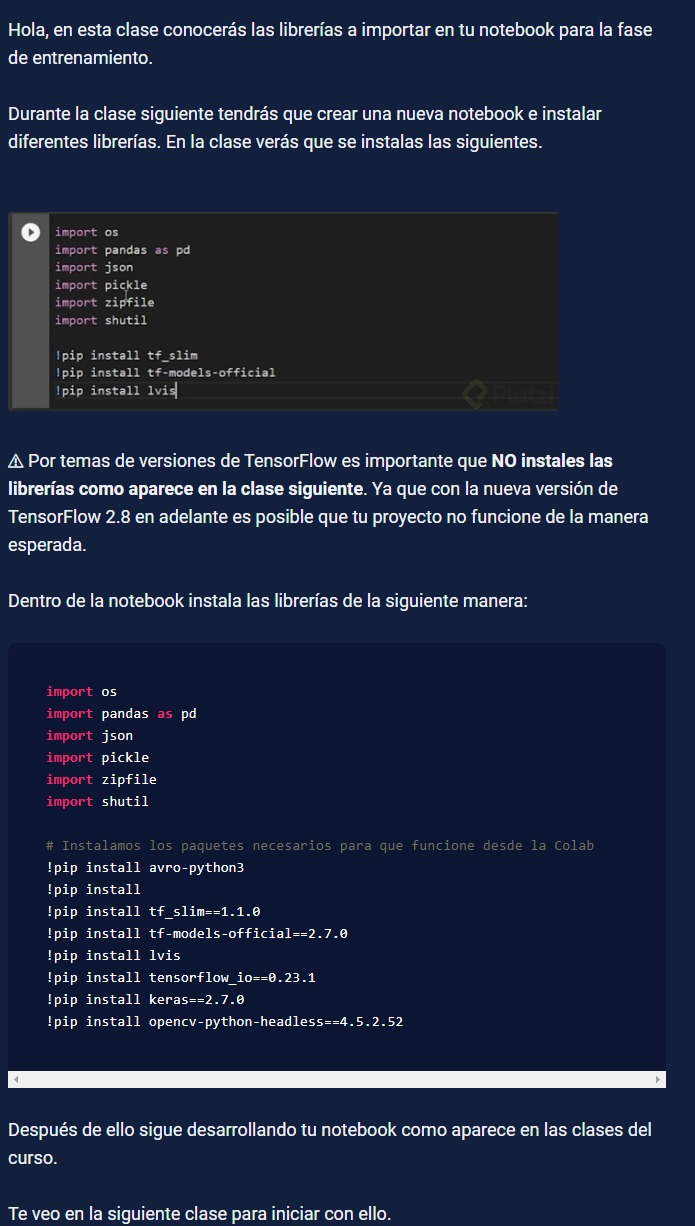

In [ ]:
# Tensorflow version 2.x.x

from __future__ import division
from __future__ import print_function
from __future__ import absolute_import

import os
import io
import pandas as pd
import tensorflow as tf
import sys
sys.path.append("../../models/research")

from PIL import Image
from object_detection.utils import dataset_util
from collections import namedtuple, OrderedDict

# It´s escential replace the labels as they are in our project
# The name should be exactly the same.
# If your model has more than 2 labels you should add them using another ELIF for each one.

def class_text_to_int(row_label):
    if row_label == 'carro':
        return 1
    elif row_label == 'moto':
        return 2
    else: return None

def split(df, group):
    """ Create a namedtuple with the filename and all data related to cars
    and/or motorcycles found on the picture"""
    data = namedtuple('data', ['filename', 'object'])
    gb = df.groupby(group)  # group DataFrame by filename
    return [data(filename, gb.get_group(x)) for filename, x inzip(gb.groups.keys(), gb.groups)]


def create_tf_example(group, path):
    """ Create TFRecord files"""
    image  = tf.keras.utils.load_img(os.path.join(path, group.filename))
    width, height = image.size
    image_format = image.format.encode('utf8')
    image = tf.io.encode_jpeg(tf.keras.utils.img_to_array(image))

    filename = group.filename.encode('utf8')

    # check if the image format is matching with your images.
    xmins = []
    xmaxs = []
    ymins = []
    ymaxs = []
    classes_text = []
    classes = []

    for index, row in group.object.iterrows():
        xmins.append(row['xmin'] / width)
        xmaxs.append(row['xmax'] / width)
        ymins.append(row['ymin'] / height)
        ymaxs.append(row['ymax'] / height)
        classes_text.append(row['class'].encode('utf8'))
        classes.append(class_text_to_int(row['class']))

    tf_example = tf.train.Example(features=tf.train.Features(feature={
        'image/height': dataset_util.int64_feature(height),
        'image/width': dataset_util.int64_feature(width),
        'image/filename': dataset_util.bytes_feature(filename),
        'image/source_id': dataset_util.bytes_feature(filename),
        'image/encoded': dataset_util.bytes_feature(image.numpy()),
        'image/format': dataset_util.bytes_feature(image_format),
        'image/object/bbox/xmin': dataset_util.float_list_feature(xmins),
        'image/object/bbox/xmax': dataset_util.float_list_feature(xmaxs),
        'image/object/bbox/ymin': dataset_util.float_list_feature(ymins),
        'image/object/bbox/ymax': dataset_util.float_list_feature(ymaxs),
        'image/object/class/text': dataset_util.bytes_list_feature(classes_text),
        'image/object/class/label': dataset_util.int64_list_feature(classes),
    }))
    return tf_example